In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock=pd.read_csv(r'C:\Users\SAURABH UPADHYAY\Company Stock and Investment.csv')
stock.head(7)

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
5,08-01-2010,0.001269,-0.013097,0.006648,0.027077
6,11-01-2010,-0.002417,0.023297,-0.008822,-0.024041


In [3]:
stock.shape

(1984, 5)

#### Here we are going to predict the stock and investment of the company in 'COMP STOCK'

In [4]:
comp=stock.drop(['Oil Investments','Gold Investments','Other sharesInvestments'],axis=1)
comp.head(7)

,Date,Comp Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565
2,05-01-2010,0.001729
3,06-01-2010,-0.015906
4,07-01-2010,-0.001849
5,08-01-2010,0.006648
6,11-01-2010,-0.008822


In [5]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1984 non-null   object 
 1   Comp Stock  1984 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [6]:
comp['Date']=pd.to_datetime(comp['Date'])
comp.head(12)
#it is in yyyy-mm-dd format so we have all monthly data

,Date,Comp Stock
0,2009-12-31,0.017354
1,2010-04-01,0.015565
2,2010-05-01,0.001729
3,2010-06-01,-0.015906
4,2010-07-01,-0.001849
5,2010-08-01,0.006648
6,2010-11-01,-0.008822
7,2010-12-01,-0.011375
8,2010-01-13,0.014106
9,2010-01-14,-0.005792


In [7]:
comp.set_index('Date', inplace=True)

In [8]:
comp=comp.resample('MS').sum()

In [9]:
comp.reset_index(inplace=True)
comp.head(5)

,Date,Comp Stock
0,2009-12-01,0.017354
1,2010-01-01,0.021966
2,2010-02-01,0.080202
3,2010-03-01,0.108993
4,2010-04-01,0.016247


In [10]:
comp.describe()

,Comp Stock
count,97.000000
mean,0.020601
std,0.060339
min,-0.146489
25%,-0.018938
50%,0.020474
75%,0.061902
max,0.161785


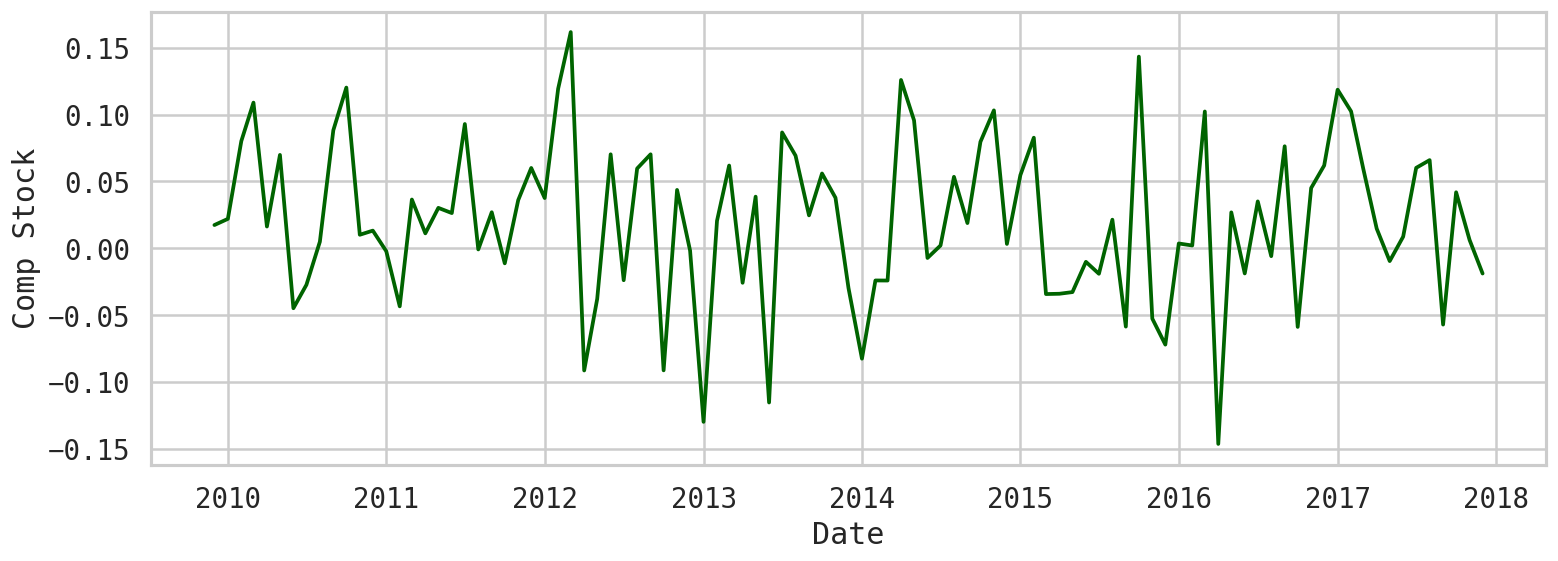

In [11]:
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
plt.figure(figsize=(15,5),dpi=120)
sns.lineplot(x='Date',y='Comp Stock',data=comp,dashes=True,markers='2',estimator=None,ci=55,err_style='band',color='darkgreen')
plt.show()

In [12]:
def adf(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations']
    for i in range(len(labels)):
        print(labels[i],' = ', result[i])
    if result[1]>0.05:
        print('The',labels[1],' is higher than 0.05 and it strongly support Null hypothesis that the data is non stationary')
    else:
         print('\nThe',labels[1],' is less than 0.05 and it strongly rejects Null hypothesis and hold the alternate hypothesis which says that the data is stationary')

In [13]:
adf(comp['Comp Stock'])

ADF Test Statistic  =  -9.792480490591313
p-value  =  6.29965087851738e-17
Lags Used  =  0
Number of Observations  =  96

The p-value  is less than 0.05 and it strongly rejects Null hypothesis and hold the alternate hypothesis which says that the data is stationary


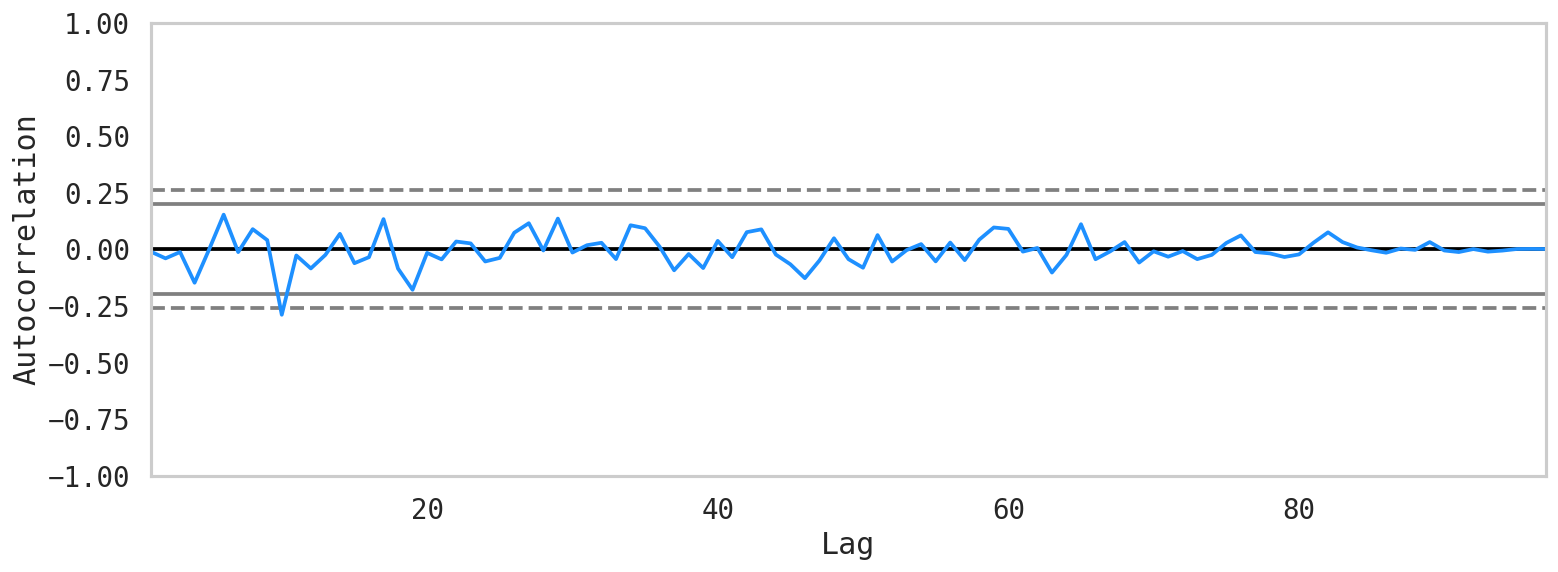

In [14]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
autocorrelation_plot(comp['Comp Stock'],color='dodgerblue')
plt.show()

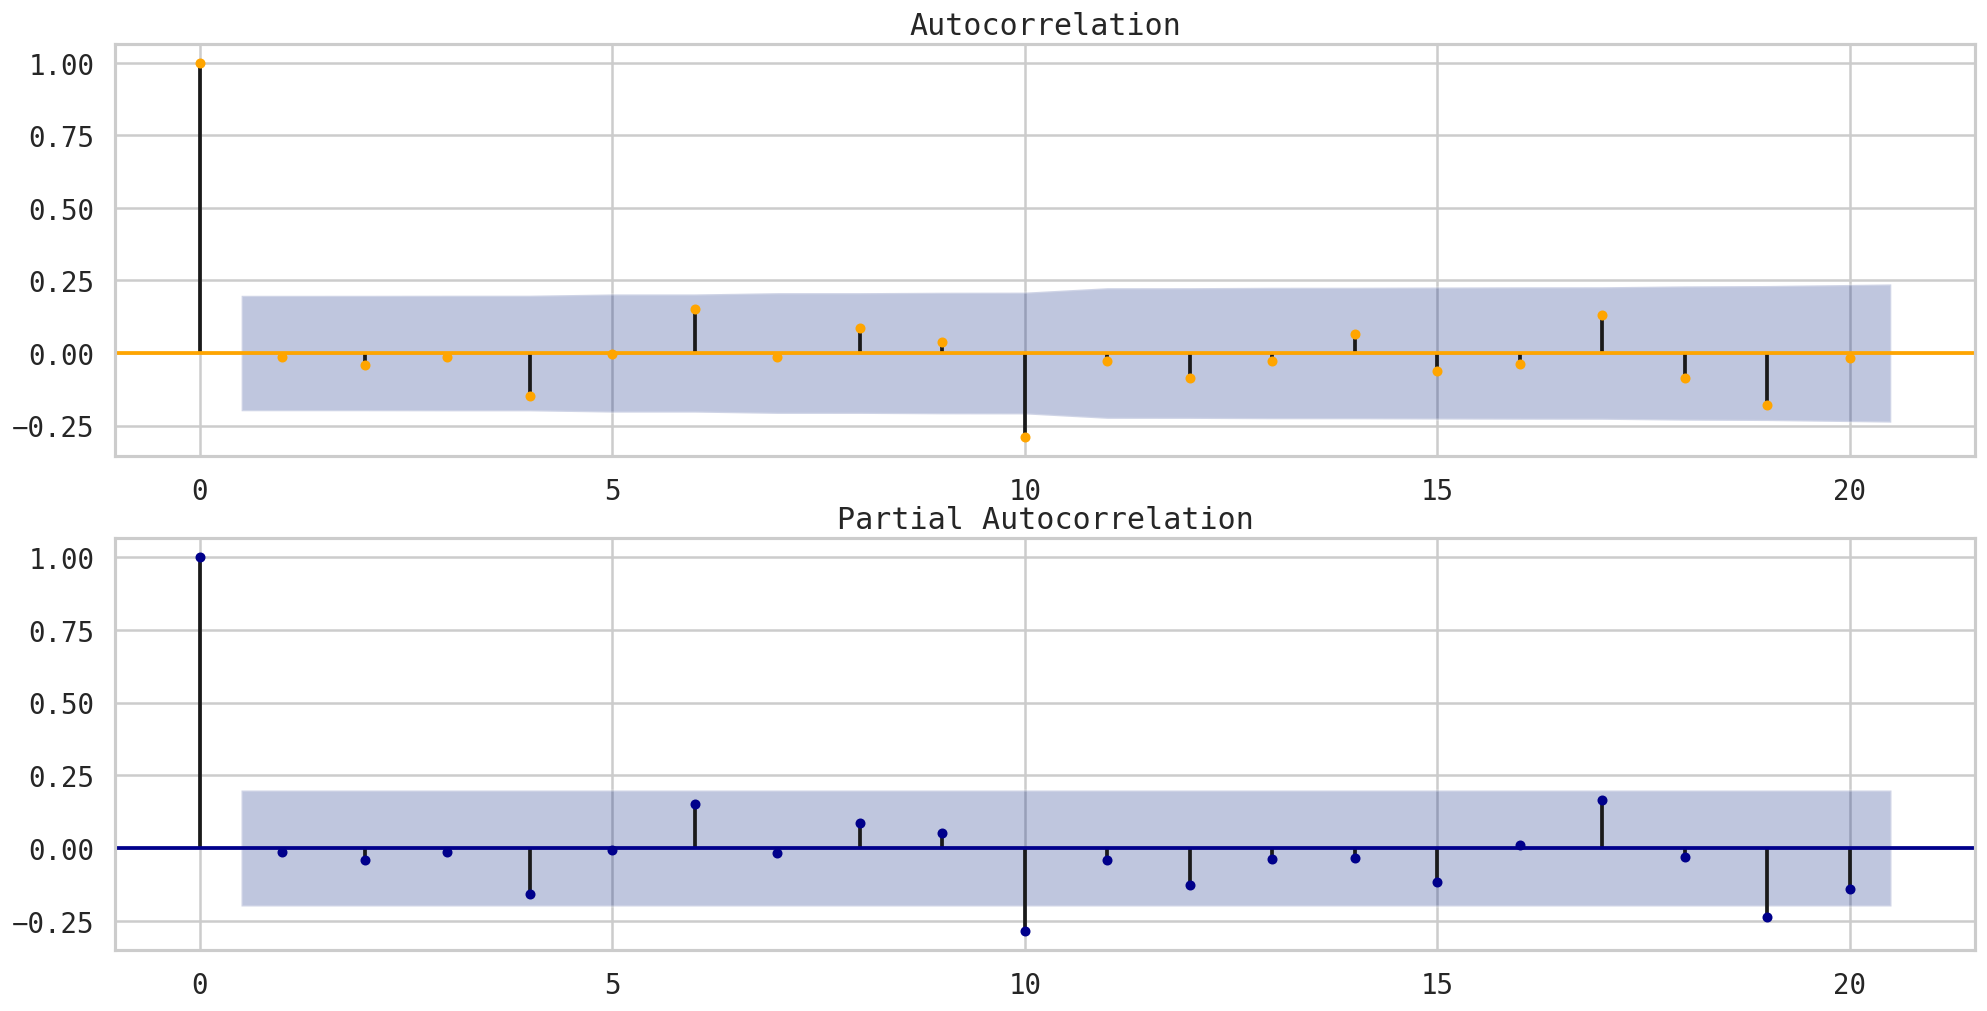

In [15]:
fig=plt.figure(figsize=(20,10),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(comp['Comp Stock'],lags=20,ax=ax1,color='orange')   #to determine AR value
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(comp['Comp Stock'],lags=20,ax=ax2,color='darkblue') # to determine MA value
plt.tight_layout
plt.show()

In [16]:
model=sm.tsa.statespace.SARIMAX(comp['Comp Stock'],order=(3,1,4),seasonal_order=(3,1,4,12))  #pdq
results=model.fit()

In [17]:
comp['forecast']=results.predict(start=50,end=97,dynamic=True)

In [18]:
comp

,Date,Comp Stock,forecast
0,2009-12-01,0.017354,NaN
1,2010-01-01,0.021966,NaN
2,2010-02-01,0.080202,NaN
3,2010-03-01,0.108993,NaN
4,2010-04-01,0.016247,NaN
...,...,...,...
92,2017-08-01,0.065951,-0.029648
93,2017-09-01,-0.057154,0.003840
94,2017-10-01,0.041893,-0.052747
95,2017-11-01,0.006212,-0.027399


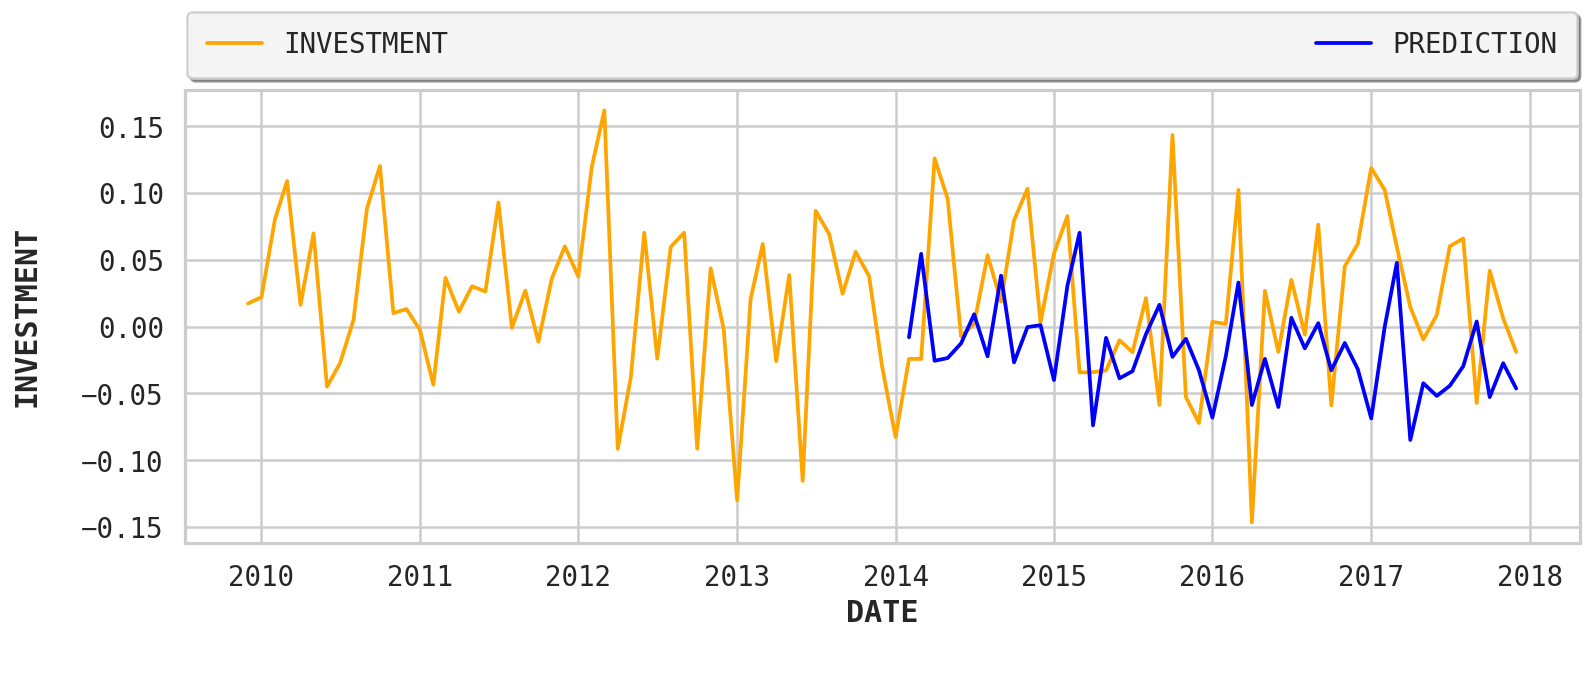

In [19]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
l1=sns.lineplot(x='Date',y='Comp Stock',data=comp,label="INVESTMENT",color='orange')
l2=sns.lineplot(x='Date',y='forecast',data=comp,label="PREDICTION",color='blue')
plt.xlabel('DATE\n',weight='bold')
plt.ylabel('INVESTMENT\n',weight='bold')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.1)
plt.show()

#### FORECASTING FOR NEXT 4 YEARS THAT IS 2018 TO 2021

In [20]:
comp.set_index('Date', inplace=True)

In [21]:
future_dates=[comp.index[-1]+ DateOffset(months=x)for x in range(0,49)]

In [22]:
future=pd.DataFrame(index=future_dates[1:],columns=comp.columns)

In [23]:
future.head(7)

,Comp Stock,forecast
2018-01-01,NaN,NaN
2018-02-01,NaN,NaN
2018-03-01,NaN,NaN
2018-04-01,NaN,NaN
2018-05-01,NaN,NaN
2018-06-01,NaN,NaN
2018-07-01,NaN,NaN


In [24]:
future.tail(8)

,Comp Stock,forecast
2021-05-01,NaN,NaN
2021-06-01,NaN,NaN
2021-07-01,NaN,NaN
2021-08-01,NaN,NaN
2021-09-01,NaN,NaN
2021-10-01,NaN,NaN
2021-11-01,NaN,NaN
2021-12-01,NaN,NaN


In [25]:
df=pd.concat([comp,future])
df.reset_index(inplace=True)

In [26]:
df['forecast'] = results.predict(start = 97, end = 144, dynamic= True)  
df

,index,Comp Stock,forecast
0,2009-12-01,0.017354,NaN
1,2010-01-01,0.021966,NaN
2,2010-02-01,0.080202,NaN
3,2010-03-01,0.108993,NaN
4,2010-04-01,0.016247,NaN
...,...,...,...
140,2021-08-01,NaN,0.010394
141,2021-09-01,NaN,0.032185
142,2021-10-01,NaN,-0.003906
143,2021-11-01,NaN,0.028239


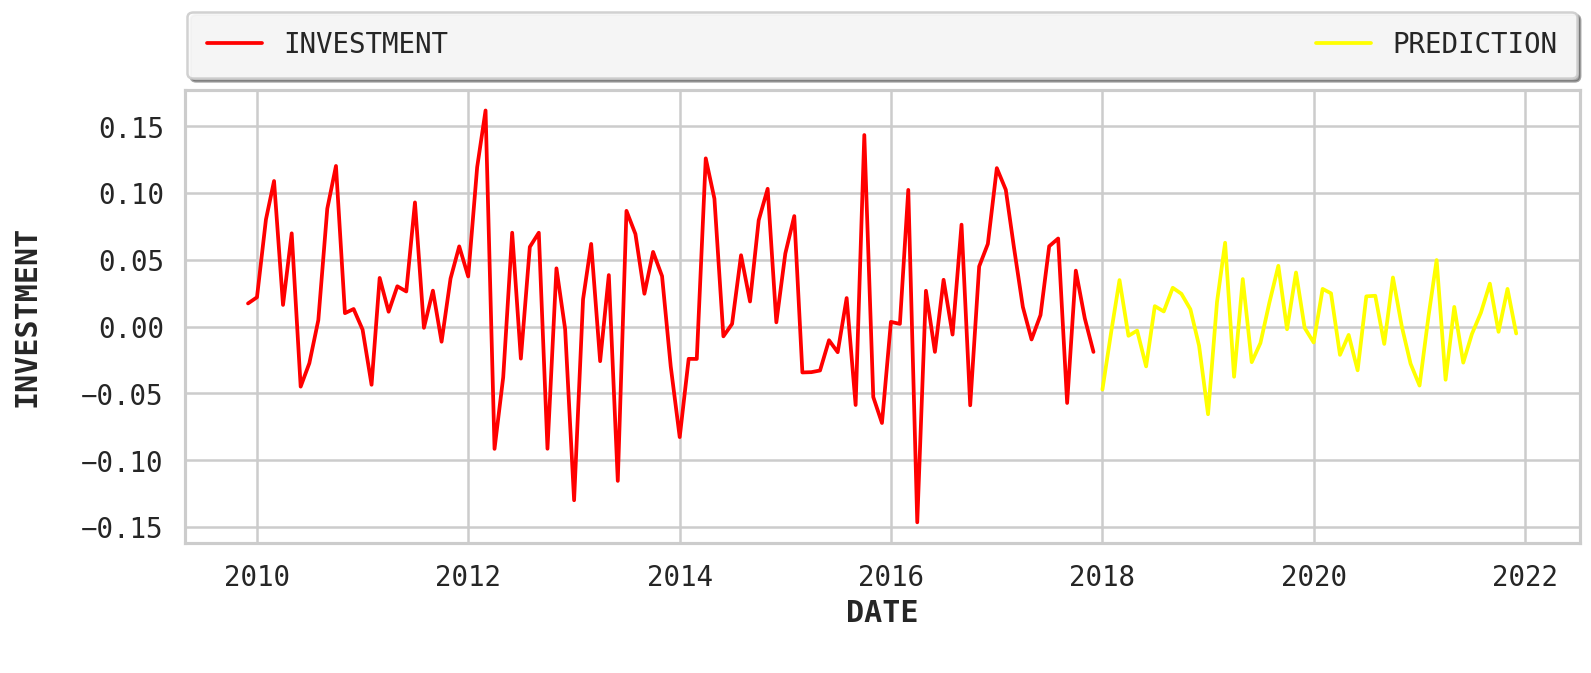

In [27]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
l1=sns.lineplot(x='index',y='Comp Stock',data=df,label="INVESTMENT",color='red')
l2=sns.lineplot(x='index',y='forecast',data=df,label="PREDICTION",color='yellow')
plt.xlabel('DATE\n',weight='bold')
plt.ylabel('INVESTMENT\n',weight='bold')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.1)
plt.show()